# WELCOME TO SOUNDERPY 

## VERTICAL PROFILE DATA RETRIEVAL TOOL

----------------------

In [1]:
# first, import sounderpy! Its fun to import as 'spy'!
import sounderpy as spy


## ------------------ VERTICAL PROFILE DATA RETRIEVAL TOOL ------------------------ ##
##                           v2.0.4 | August 6th, 2023                              ##
##                             (C) KYLE J GILLETT                                   ##
##  THIS TOOL LOADS RAOB, IGRA, RAP, RUC, ERA5, RAP-ANALYSIS, & BUFKIT PROFILE DATA ##
## -------------------- THANK YOU FOR USING THIS PACKAGE -------------------------- ##



## UNDERSTANDING SOUNDERPY FUNCTIONALITY
-------
### get_bufkit_data()
    Access GFS, NAM, NAMNEST, RAP, HRRR, SREF, & HIRESW profile data 
### get_model_data()
    Access RAP-RUC & ERA5 reanalysis data 
### get_obs_data()
    Access RAOB & IGRAv2 

-----

## GETTING BUFKIT DATA

In [11]:
# to get bufkit data, we need to use the get_bufkit_data() function: 
# get_bufkit_data(model, station, fcst_hr, run_year, run_month, run_day, run_hour)

# THERE ARE TWO TYPES OF BUFKIT DATA WE CAN GET -- ARCHIVED FORECASTS & MOST RECENT FORECASTS 

# To get archived forecasts we need every kwarg.
# this will get us a 12z GFS forecast from 08/05/2023 at forecast hour 6 for KMOP
clean_data = spy.get_bufkit_data('GFS', 'KMOP', 6, '2023', '08', '05', '12')

# To get the most recent forecasts we use the same function, but we *don't need a year, month, day or hour!*
# You just need a model, station and forecast hour.
# This will get you the most recent run, at forecast hour 6, for KMOP.
clean_data = spy.get_bufkit_data('HRRR', 'KMOP', 6)

-- BUFKIT DATA ACCESS FUNCTION --
---------------------------------
RUNTIME: 00:00:00


-----

## GETTING OBSERVED DATA

In [13]:
# to get observed data, we need to use the get_obs_data() function: 
# get_obs_data(station, year, month, day, hour)

# This function will get us a 12z RAOB for DTX on 08/05/2023
clean_data = spy.get_obs_data('DTX', '2023', '08', '05', '12')

-- OBSERVED DATA ACCESS FUNCTION --
-----------------------------------
FOUND RAOB: DTX on 08/05/2023 at 12z | From UW
RUNTIME: 00:00:02


_____


## GETTING REANALYSIS DATA

In [17]:
# To get reanalysis data from the ERA5 or the RAP-RUC, we use
# get_model_data(method, latlon, year, month, day, hour)

# method is what model we want to use, 'era5' or 'rap-ruc'
# latlon is a list of a lat & lon point, such as: [41.98, -97.43]
# the 'date' kwargs are all strings for the date & time that you want to 'reanalize'

# NOTE: to use ERA5 data, you must set up an account with the Climate Data Store @ https://cds.climate.copernicus.eu/api-how-to
# NOTE: *after using get_model_data()*, you must then use the parse_data() function to clean up the data

# this function will get us a *RAW* 15z ERA5 profile on 5/20/2023 at the point [41.98, -97.43]
raw_data = spy.get_model_data('era5', [41.98, -97.43], '2023', '05', '20', '15')

# now put it through the parse_data() function -- this is *ONLY NEEDED* after the get_model_data()
# this function will clean up the data for us and give us a *CLEAN* profile
clean_data = spy.parse_data(raw_data)

2023-08-06 11:02:27,320 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-08-06 11:02:27,324 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


-- ERA5 REANALYSIS DATA ACCESS FUNCTION --
------------------------------------------


2023-08-06 11:02:27,502 INFO Request is completed
INFO:cdsapi:Request is completed
2023-08-06 11:02:27,627 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-08-06 11:02:27,640 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


DATASET ACCESSED: reanalysis-era5-pressure-levels


2023-08-06 11:02:27,848 INFO Request is completed
INFO:cdsapi:Request is completed
2023-08-06 11:02:27,849 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data9/adaptor.mars.internal-1691333876.4589756-27259-17-b4383468-19af-4a87-85a4-8e1a01b952d6.nc to ./output.nc (10.7K)
INFO:cdsapi:Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data9/adaptor.mars.internal-1691333876.4589756-27259-17-b4383468-19af-4a87-85a4-8e1a01b952d6.nc to ./output.nc (10.7K)


DATASET ACCESSED: reanalysis-era5-single-levels


2023-08-06 11:02:27,996 INFO Download rate 73.1K/s                                                                     
INFO:cdsapi:Download rate 73.1K/s
2023-08-06 11:02:28,005 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data7/adaptor.mars.internal-1691333882.16444-8602-16-75715601-3cae-4a8f-b14a-8559302bbb05.nc to ./output.nc (3.3K)
INFO:cdsapi:Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data7/adaptor.mars.internal-1691333882.16444-8602-16-75715601-3cae-4a8f-b14a-8559302bbb05.nc to ./output.nc (3.3K)
2023-08-06 11:02:28,153 INFO Download rate 22.6K/s                                                                     
INFO:cdsapi:Download rate 22.6K/s


- COMPLETE -
RUNTIME: 00:00:02
-- ERA5 REANALYSIS DATA PARSE FUNCTION --
------------------------------------------
- COMPLETE -
RUNTIME: 00:00:00


## CHECK OUT THE DATA

In [18]:
clean_data

{'T': array([ 1.68156433e+01,  1.42814384e+01,  1.18406497e+01,  9.52785021e+00,
         7.09296861e+00,  6.06863714e+00,  6.30139569e+00,  6.41028208e+00,
         6.67928387e+00,  7.22292261e+00,  7.07094984e+00,  5.95186028e+00,
         4.45446742e+00,  2.96685890e+00,  1.49478749e+00,  2.32253307e-02,
        -1.16201192e+00, -2.34724917e+00, -3.74204882e+00, -5.38840313e+00,
        -7.03475745e+00, -8.96901012e+00, -1.10137535e+01, -1.30584969e+01,
        -1.50903883e+01, -1.71188935e+01, -1.91473988e+01, -2.11531550e+01,
        -2.31453877e+01, -2.51376205e+01, -2.71333708e+01, -2.91450200e+01,
        -3.11566691e+01, -3.31683183e+01, -3.51736772e+01, -3.71691543e+01,
        -3.91646314e+01, -4.11601085e+01, -4.31326297e+01, -4.49812809e+01,
        -4.68299322e+01, -4.86785834e+01, -5.05272346e+01, -5.22215631e+01,
        -5.36116030e+01, -5.50016429e+01, -5.56519763e+01, -5.58706100e+01,
        -5.60892437e+01, -5.61874309e+01, -5.62166252e+01, -5.62458196e+01,
       

## NOW WE CAN MAKE A QUICK METPY PLOT!

RUNTIME: 00:00:00


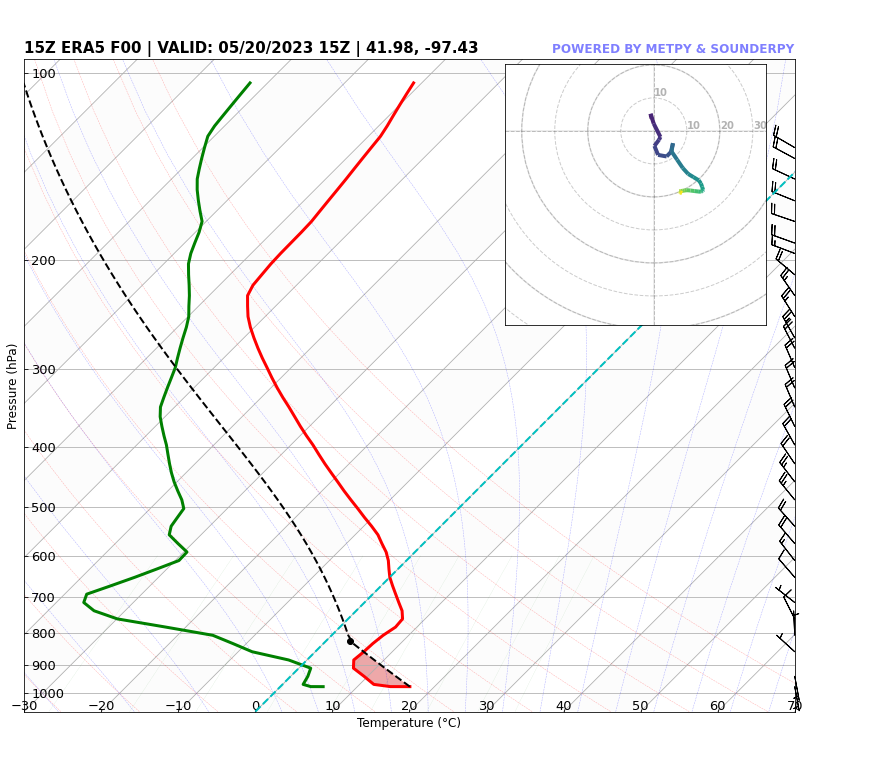

In [20]:
# we will use the 'show' kwarg here to plot it inline
# but you can also use 'save' and add an additional kwarg 'filename'
# to save the plot to a file!

# first here we can make a sounding! 
spy.metpy_sounding(clean_data, 'show')

RUNTIME: 00:00:00


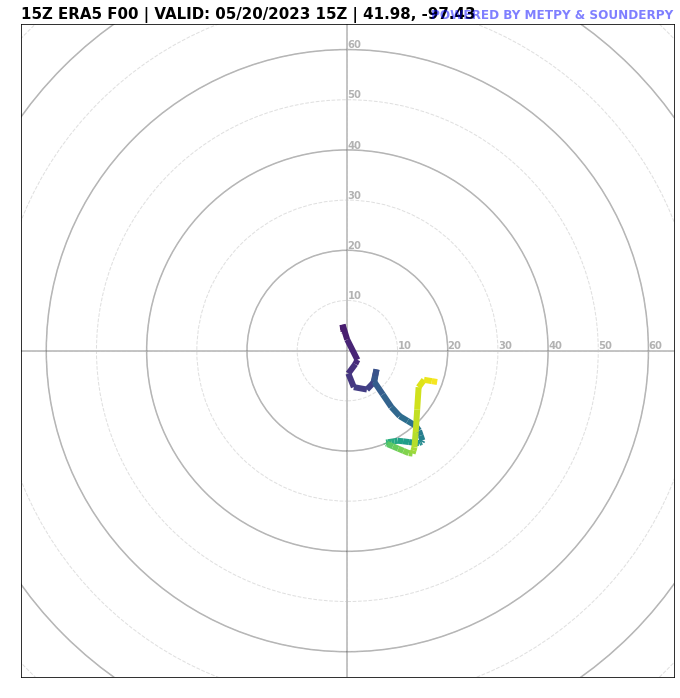

In [21]:
# and we can make a hodograph!
spy.metpy_hodograph(clean_data, 'show')

----

## SAVING PROFILE DATA TO A FILE

In [24]:
# SounderPy offers two ways to use this...

# save to a CSV!
spy.to_csv(clean_data, 'sounderpy_csv_data.csv')

# save to a CM1 input_sounding file!
spy.to_cm1(clean_data, 'sounderpy_cm1_data')

----

## FINDING LAT/LON PAIRS

In [27]:
# SounderPy offers several ways to find latlons!

# METAR
spy.metar_latlon('KMOP')
# RAOB
spy.raob_latlon('KDTX')
# IGRAv2 
spy.igra_latlon('GMM00010393')
# BUOY
spy.buoy_latlon('41001')

[34.7, -72.73]